#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

#**2. Preprocesamiento de Datos**


---


In [25]:
df_banco = pd.read_csv("german_credit.csv")
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

### Eliminar datos duplicados

In [4]:
# Mostrar datos duplicados antes de eliminar
duplicados = df_banco[df_banco.duplicated()]
duplicados
print(f"\nCantidad de datos duplicados antes de eliminar: {duplicados.shape[0]}\n")

# Eliminar duplicados
df_banco = df_banco.drop_duplicates()

# Mostrar datos duplicados después de eliminar
duplicados_despues = df_banco[df_banco.duplicated()]
duplicados_despues
print(f"\nCantidad de datos duplicados después de eliminar: {duplicados_despues.shape[0]}\n")


Cantidad de datos duplicados antes de eliminar: 0


Cantidad de datos duplicados después de eliminar: 0



### Tratamiento de nulos, eliminar nulos

In [5]:
print("\nCantidad total de datos nulos antes de eliminar:", df_banco.isnull().sum().sum())

# Eliminar los registros con valores nulos
df_banco = df_banco.dropna()

# Mostrar la cantidad total de datos nulos después de eliminar
print("Cantidad total de datos nulos después de eliminar:", df_banco.isnull().sum().sum())


Cantidad total de datos nulos antes de eliminar: 0
Cantidad total de datos nulos después de eliminar: 0


### Transformar los datos categóricos a numéricos:
- se cambia las cadenas de texto en todas las características categóricas con sus respectivos valores numéricos según el archivo german_dataset_dictionary.txt.

In [6]:
# Copiar el DataFrame original
df_banco = df_banco.copy()

# Diccionario de mapeo
mapeo = {
    'account_check_status': {'< 0 DM': 1, '0 <= ... < 200 DM': 2, 'no checking account': 4, '>= 200 DM / salary assignments for at least 1 year': 3},
    'credit_history': {'critical account/ other credits existing (not at this bank)': 5, 'existing credits paid back duly till now': 3, 'delay in paying off in the past': 4, 'no credits taken/ all credits paid back duly': 1, 'all credits at this bank paid back duly': 2},
    'purpose': {'car (new)': 1, 'car (used)': 2, 'furniture/equipment': 3, 'radio/television': 4, 'domestic appliances': 5, 'repairs': 6, 'education': 7, '(vacation - does not exist?)': 8, 'retraining': 9, 'business': 10, 'others': 11},
    'savings': {'unknown/ no savings account': 1, '... < 100 DM': 5, '500 <= ... < 1000 DM ': 3, '.. >= 1000 DM ': 2, '100 <= ... < 500 DM': 5},
    'present_emp_since': {'.. >= 7 years': 1, '1 <= ... < 4 years': 3, '4 <= ... < 7 years': 2, 'unemployed': 5, '... < 1 year ': 4},
    'personal_status_sex': {'male : single': 3, 'female : divorced/separated/married': 2, 'male : divorced/separated': 1, 'male : married/widowed':4, 'female : single': 5},
    'other_debtors': {'none': 1, 'co-applicant': 2, 'guarantor': 3},
    'property': {'real estate': 1, 'if not A121 : building society savings agreement/ life insurance': 2, 'unknown / no property':4, 'if not A121/A122 : car or other, not in attribute 6':3},   
    'other_installment_plans': {'bank': 1, 'stores': 2, 'none': 3},
    'housing': {'rent': 1, 'own': 2, 'for free': 3},
    'job': {'skilled employee / official':3, 'unskilled - resident':2, 'management/ self-employed/ highly qualified employee/ officer':4, 'unemployed/ unskilled - non-resident':1},
    'telephone': {'yes, registered under the customers name ':1, 'none':0},  
    'foreign_worker': {'yes': 1, 'no': 0}
}

#  mapeo a las columnas categoricas
for columna, diccionario in mapeo.items():
    df_banco[columna] = df_banco[columna].map(diccionario)

df_banco.head()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


### Funcion

In [46]:
def procesar_datos():
    global df_banco, resultados
    
    df_banco = pd.read_csv("german_credit.csv")
    
    # Mostrar datos duplicados antes de eliminar
    duplicados = df_banco[df_banco.duplicated()]
    duplicados
    print(f"\nCantidad de datos duplicados antes de eliminar: {duplicados.shape[0]}\n")

    # Eliminar duplicados
    df_banco = df_banco.drop_duplicates()

    # Mostrar datos duplicados después de eliminar
    duplicados_despues = df_banco[df_banco.duplicated()]
    duplicados_despues
    print(f"\nCantidad de datos duplicados después de eliminar: {duplicados_despues.shape[0]}\n")

    print("\nCantidad total de datos nulos antes de eliminar:", df_banco.isnull().sum().sum())

    # Eliminar los registros con valores nulos
    df_banco = df_banco.dropna()

    # Mostrar la cantidad total de datos nulos después de eliminar
    print("Cantidad total de datos nulos después de eliminar:", df_banco.isnull().sum().sum())

    # Transformar los datos categoricos a numericos
    # Copiar el DataFrame original
    df_banco = df_banco.copy()

    # Diccionario de mapeo
    mapeo = {
    'account_check_status': {'< 0 DM': 1, '0 <= ... < 200 DM': 2, 'no checking account': 4, '>= 200 DM / salary assignments for at least 1 year': 3},
    'credit_history': {'critical account/ other credits existing (not at this bank)': 5, 'existing credits paid back duly till now': 3, 'delay in paying off in the past': 4, 'no credits taken/ all credits paid back duly': 1, 'all credits at this bank paid back duly': 2},
    'purpose': {'car (new)': 1, 'car (used)': 2, 'furniture/equipment': 3, 'radio/television': 4, 'domestic appliances': 5, 'repairs': 6, 'education': 7, '(vacation - does not exist?)': 8, 'retraining': 9, 'business': 10, 'others': 11},
    'savings': {'unknown/ no savings account': 1, '... < 100 DM': 5, '500 <= ... < 1000 DM ': 3, '.. >= 1000 DM ': 2, '100 <= ... < 500 DM': 5},
    'present_emp_since': {'.. >= 7 years': 1, '1 <= ... < 4 years': 3, '4 <= ... < 7 years': 2, 'unemployed': 5, '... < 1 year ': 4},
    'personal_status_sex': {'male : single': 3, 'female : divorced/separated/married': 2, 'male : divorced/separated': 1, 'male : married/widowed':4, 'female : single': 5},
    'other_debtors': {'none': 1, 'co-applicant': 2, 'guarantor': 3},
    'property': {'real estate': 1, 'if not A121 : building society savings agreement/ life insurance': 2, 'unknown / no property':4, 'if not A121/A122 : car or other, not in attribute 6':3},   
    'other_installment_plans': {'bank': 1, 'stores': 2, 'none': 3},
    'housing': {'rent': 1, 'own': 2, 'for free': 3},
    'job': {'skilled employee / official':3, 'unskilled - resident':2, 'management/ self-employed/ highly qualified employee/ officer':4, 'unemployed/ unskilled - non-resident':1},
    'telephone': {'yes, registered under the customers name ':1, 'none':0},  
    'foreign_worker': {'yes': 1, 'no': 0}
    }

    #  mapeo a las columnas categoricas
    for columna, diccionario in mapeo.items():
        df_banco[columna] = df_banco[columna].map(diccionario)
            

procesar_datos()
df_banco.head(7)


Cantidad de datos duplicados antes de eliminar: 0


Cantidad de datos duplicados después de eliminar: 0


Cantidad total de datos nulos antes de eliminar: 0
Cantidad total de datos nulos después de eliminar: 0


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1
5,0,4,36,3,8,9055,1,3,2,3,1,4,4,35,3,3,1,2,2,1,1
6,0,4,24,3,4,2835,3,1,3,3,1,4,2,53,3,2,1,3,1,0,1


In [ ]:
###Tu función procesar_datos() y tu código aqui.

In [13]:
procesar_datos()
df_banco.head()


Cantidad de datos duplicados antes de eliminar: 0


Cantidad de datos duplicados después de eliminar: 0


Cantidad total de datos nulos antes de eliminar: 0
Cantidad total de datos nulos después de eliminar: 0


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


In [27]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

#**3. Exploración de Datos**


---


In [15]:


# Copiar el DataFrame original
df_banco = df_banco.copy()

# Crear la variable 'sexo'
#sexo_mapping = {'male : single':0, 'female : divorced/separated/married':1, 'male : divorced/separated':1, 'male : married/widowed':0}
#df_banco_transformado['sexo'] = df_banco_transformado['personal_status_sex'].map(sexo_mapping)

# Crear la variable 'estado_civil'
#estado_civil_mapping = {'male : single': 1, 'female : divorced/separated/married': 0, 'male : divorced/separated': 1, 'male : married/widowed': 1}
#df_banco_transformado['estado_civil'] = df_banco_transformado['personal_status_sex'].map(estado_civil_mapping)


# Crear la variable 'sexo'
#df_banco_transformado['sexo'] = df_banco_transformado['personal_status_sex'].apply(lambda x: 1 if 'female' in str(x).lower() else 0)

# Crear la variable 'estado_civil'
#df_banco_transformado['estado_civil'] = df_banco_transformado['personal_status_sex'].apply(lambda x: 1 if 'single' in str(x).lower() else 0)

# Crear la variable 'sexo'
sexo_mapping = {1: 0, 2: 1, 3: 0, 4: 0}
df_banco['sexo'] = df_banco['personal_status_sex'].map(sexo_mapping)


# Crear la variable 'estado_civi
estado_civil_mapping = {1: 1, 2: 0, 3: 1, 4: 1}
df_banco['estado_civil'] = df_banco['personal_status_sex'].map(estado_civil_mapping)

# Crear la variable 'rango_edad'
bins_edad = [18, 30, 40, 50, 60, 70, 80]
labels_edad = [1, 2, 3, 4, 5, 6]
df_banco['rango_edad'] = pd.cut(x=df_banco['age'], bins=bins_edad, labels=labels_edad)

# Crear la variable 'rango_plazos_credito'
bins_plazos_credito = [1, 12, 24, 36, 48, 60, 72]
labels_plazos_credito = [1, 2, 3, 4, 5, 6]
df_banco['rango_plazos_credito'] = pd.cut(x=df_banco['duration_in_month'], bins=bins_plazos_credito, labels=labels_plazos_credito)

# Crear la variable 'rango_valor_credito'
bins_valor_credito = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
labels_valor_credito = [i for i in range(1, 21)]
df_banco['rango_valor_credito'] = pd.cut(x=df_banco['credit_amount'], bins=bins_valor_credito, labels=labels_valor_credito)

# Eliminar las columnas originales
columnas_eliminar = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount']
df_banco = df_banco.drop(columnas_eliminar, axis=1)

# Mostrar el DataFrame transformado
df_banco.head()


,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [ ]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

,personal_status_sex,age,duration_in_month,credit_amount,default
0,3,67,6,1169,0
1,2,22,48,5951,1
2,3,49,12,2096,0
3,3,45,42,7882,0
4,3,53,24,4870,1


In [ ]:
#función feature_engineering() compañera
def feature_engineering():
  global df_banco, resultados  #variables globales

  map_sexo = {2: 1, 5:1, 1: 0, 3: 0, 4: 0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(map_sexo)

  map_estado_civil={3: 1, 5: 1, 1: 0, 2: 0,4: 0}
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(map_estado_civil)

  df_banco['rango_edad'] = pd.cut(x = df_banco['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])

  df_banco['rango_plazos_credito'] = pd.cut(x = df_banco['duration_in_month'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5,6])

  bins = [i for i in range(0, 21000, 1000)]
  labels = [i for i in range(1, 21)]
  df_banco['rango_valor_credito'] = pd.cut(x=df_banco['credit_amount'], bins=bins, labels=labels, include_lowest=True)

  #columnas a eliminar
  columnas_eliminar = ['personal_status_sex', 'age','duration_in_month', 'credit_amount']
  df_banco = df_banco.drop(columns=columnas_eliminar)

  #cambiando el tipo de datos a int
  df_banco['rango_edad'] = df_banco['rango_edad'].astype(int)
  df_banco['rango_plazos_credito'] = df_banco['rango_plazos_credito'].astype(int)
  df_banco['rango_valor_credito'] = df_banco['rango_valor_credito'].astype(int)


### función feature_engineering

In [47]:
#Tu función feature_engineering() y tu código aqui
def feature_engineering():
    global df_banco, resultados
    
    # Crear la variable sexo
    #sexo_mapping = {1: 0, 2: 1, 3: 0, 4: 0}
    sexo_mapping = {2: 1, 5:1, 1: 0, 3: 0, 4: 0}
    df_banco['sexo'] = df_banco['personal_status_sex'].map(sexo_mapping)
   
    # Crear la variable estado_civil
    #estado_civil_mapping = {1: 1, 2: 0, 3: 1, 4: 1}
    estado_civil_mapping = {3: 1, 5: 1, 1: 0, 2: 0,4: 0}
    df_banco['estado_civil'] = df_banco['personal_status_sex'].map(estado_civil_mapping)
     
    # Crear la variable 'rango_edad'
    bins_edad = [18, 30, 40, 50, 60, 70, 80]
    labels_edad = [1, 2, 3, 4, 5, 6]
    df_banco['rango_edad'] = pd.cut(x=df_banco['age'], bins=bins_edad, labels=labels_edad)
    
     
    # Crear la variable 'rango_plazos_credito'
    bins_plazos_credito = [1, 12, 24, 36, 48, 60, 72]
    labels_plazos_credito = [1, 2, 3, 4, 5, 6]
    df_banco['rango_plazos_credito'] = pd.cut(x=df_banco['duration_in_month'], bins=bins_plazos_credito, labels=labels_plazos_credito)

    # Crear la variable 'rango_valor_credito'
    bins_valor_credito = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
    labels_valor_credito = [i for i in range(1, 21)]
    df_banco['rango_valor_credito'] = pd.cut(x=df_banco['credit_amount'], bins=bins_valor_credito, labels=labels_valor_credito)

    # Eliminar las columnas originales
    columnas_eliminar = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount']
    df_banco = df_banco.drop(columnas_eliminar, axis=1)
    
    # Cambiar las varibles categoricas a numerica(int)
    df_banco['rango_edad'] = df_banco['rango_edad'].astype(int)
    df_banco['rango_plazos_credito'] = df_banco['rango_plazos_credito'].astype(int)
    df_banco['rango_valor_credito'] = df_banco['rango_valor_credito'].astype(int)



feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [ ]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


### Visualización:

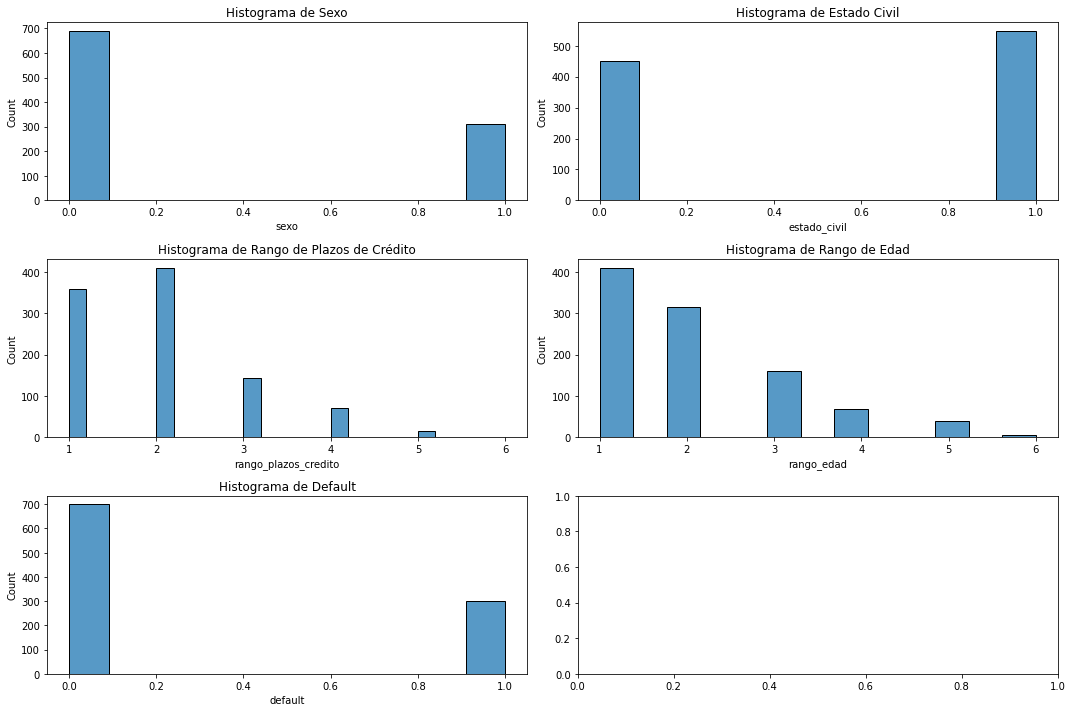

In [36]:
# Tu función analisis_exploratorio() y tu código aquí
def analisis_exploratorio():
    global df_banco, resultados
    
    # Histogramas
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 2, 1)
    sns.histplot(df_banco['sexo'], kde=False)
    plt.title('Histograma de Sexo')

    plt.subplot(3, 2, 2)
    sns.histplot(df_banco['estado_civil'], kde=False)
    plt.title('Histograma de Estado Civil')

    plt.subplot(3, 2, 3)
    sns.histplot(df_banco['rango_plazos_credito'], kde=False)
    plt.title('Histograma de Rango de Plazos de Crédito')

    plt.subplot(3, 2, 4)
    sns.histplot(df_banco['rango_edad'], kde=False)
    plt.title('Histograma de Rango de Edad')

    # Añade otra fila si es necesario
    plt.subplot(3, 2, 5)
    sns.histplot(df_banco['default'], kde=False)
    plt.title('Histograma de Default')

    plt.subplot(3, 2, 6)
    # Añade más subgráficos en la tercera fila si es necesario
    # sns.histplot(df_banco['otro_atributo'], kde=False)
    # plt.title('Histograma de Otro Atributo')

    # Muestra los gráficos y ajusta el espaciado
    plt.tight_layout()
    plt.show()

# Llama a la función
analisis_exploratorio()



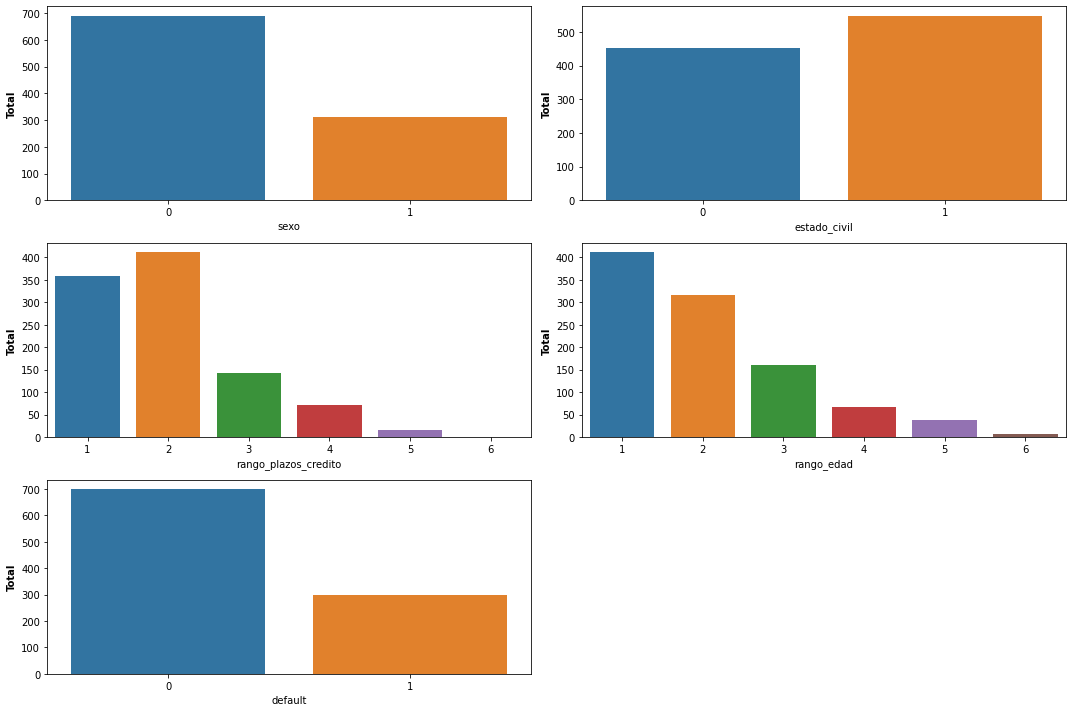

In [48]:
# Tu función analisis_exploratorio() y tu código aquí
def analisis_exploratorio():
    global df_banco, resultados
    
    # Gráficos de barras
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 2, 1)
    sns.countplot(x='sexo', data=df_banco)
    plt.ylabel('Total', fontweight='bold')

    plt.subplot(3, 2, 2)
    sns.countplot(x='estado_civil', data=df_banco)
    plt.ylabel('Total', fontweight='bold')

    plt.subplot(3, 2, 3)
    sns.countplot(x='rango_plazos_credito', data=df_banco)
    plt.ylabel('Total', fontweight='bold')

    plt.subplot(3, 2, 4)
    sns.countplot(x='rango_edad', data=df_banco)
    plt.ylabel('Total', fontweight='bold')

    # Añade otra fila si es necesario
    plt.subplot(3, 2, 5)
    sns.countplot(x='default', data=df_banco)
    plt.ylabel('Total', fontweight='bold')

    #plt.subplot(3, 2, 6)
    # sns.countplot(x='otro_atributo', data=df_banco)
    # plt.title('Gráfico de Barras de Otro Atributo')
    #plt.ylabel('Total', fontweight='bold')

    # Muestra los gráficos y ajusta el espaciado
    plt.tight_layout()
    plt.show()

# Llama a la función
analisis_exploratorio()


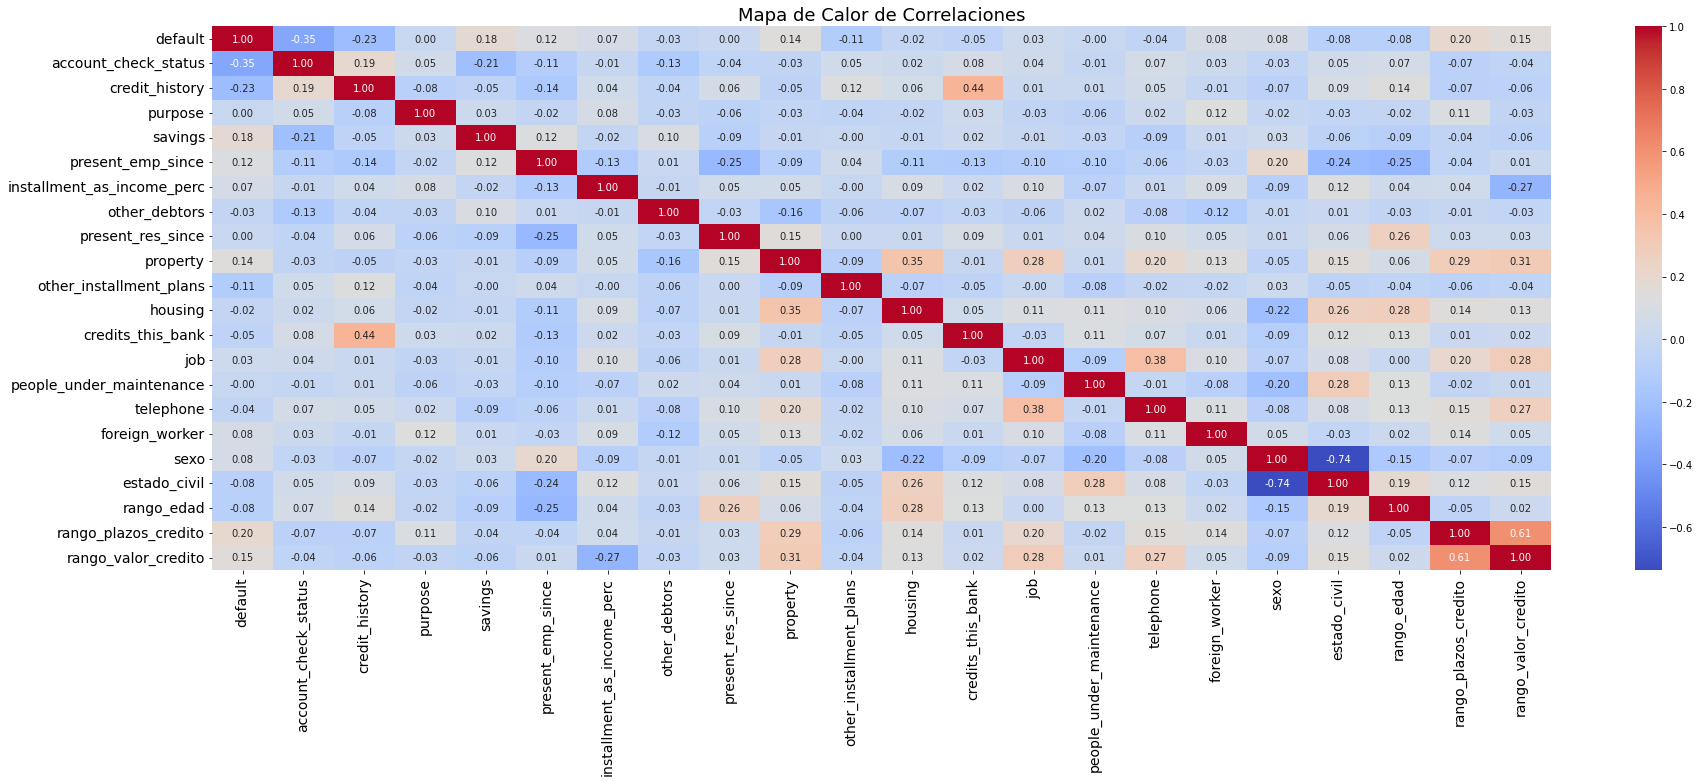

In [38]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

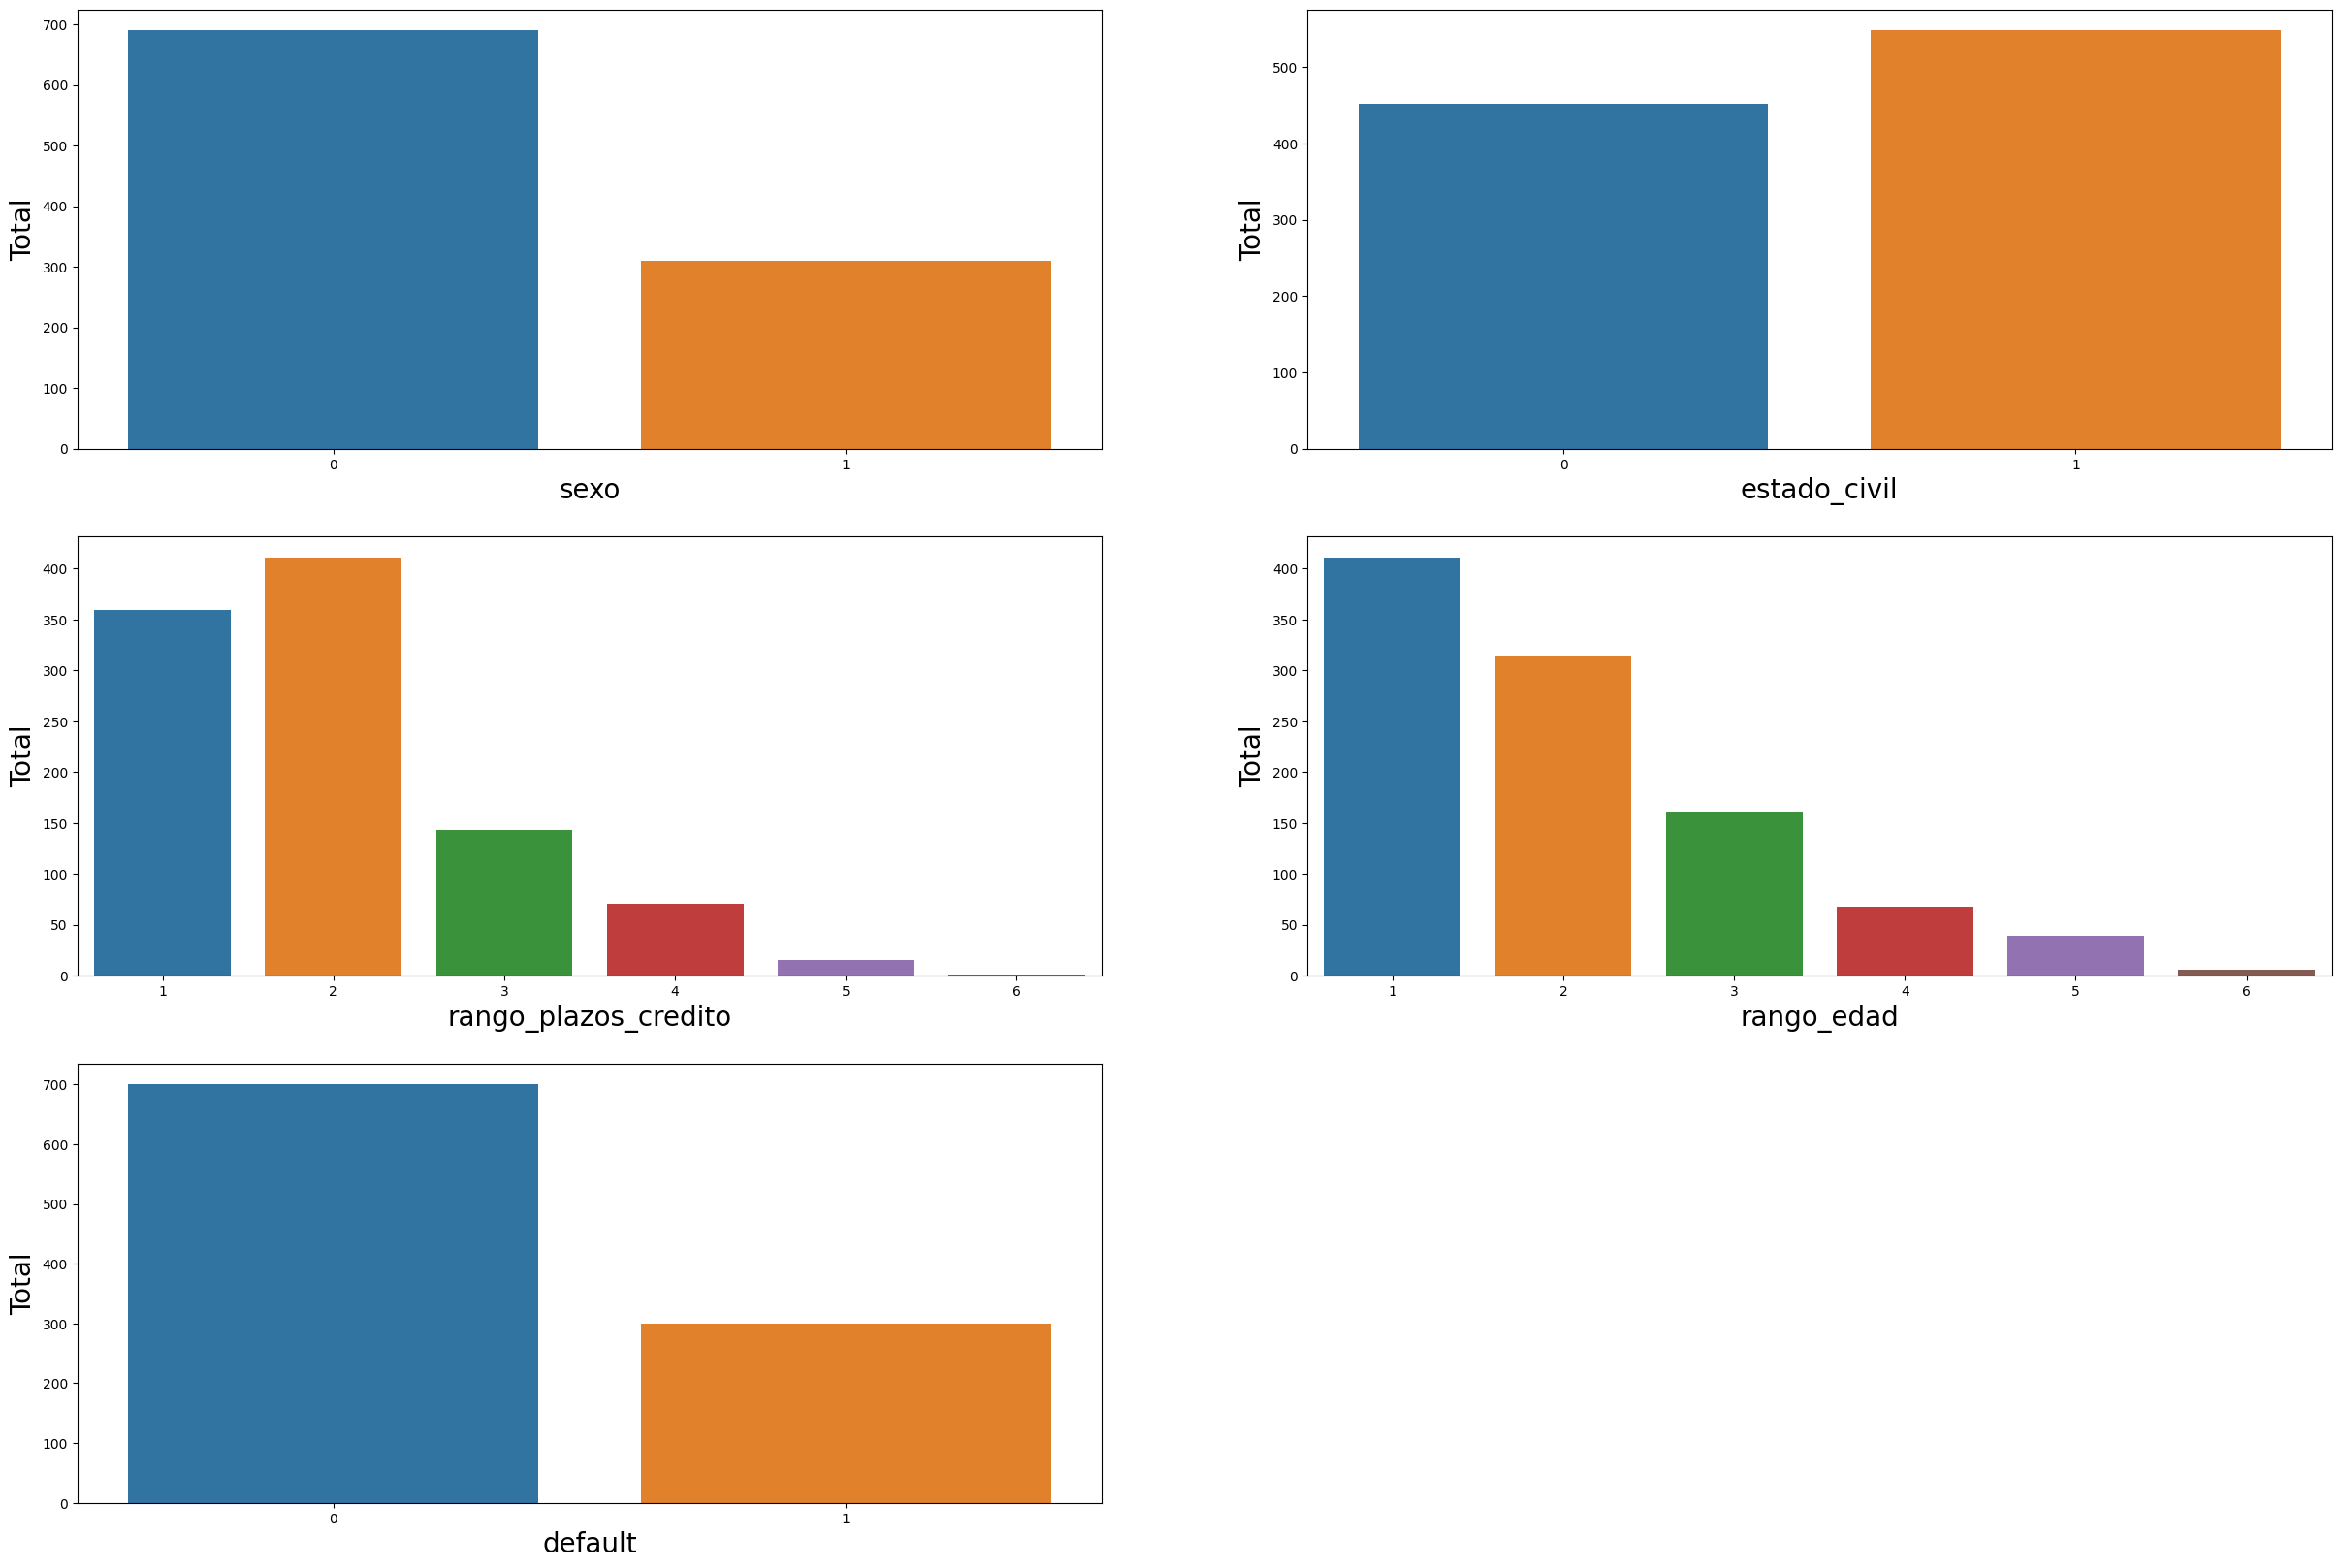

In [ ]:
analisis_exploratorio()

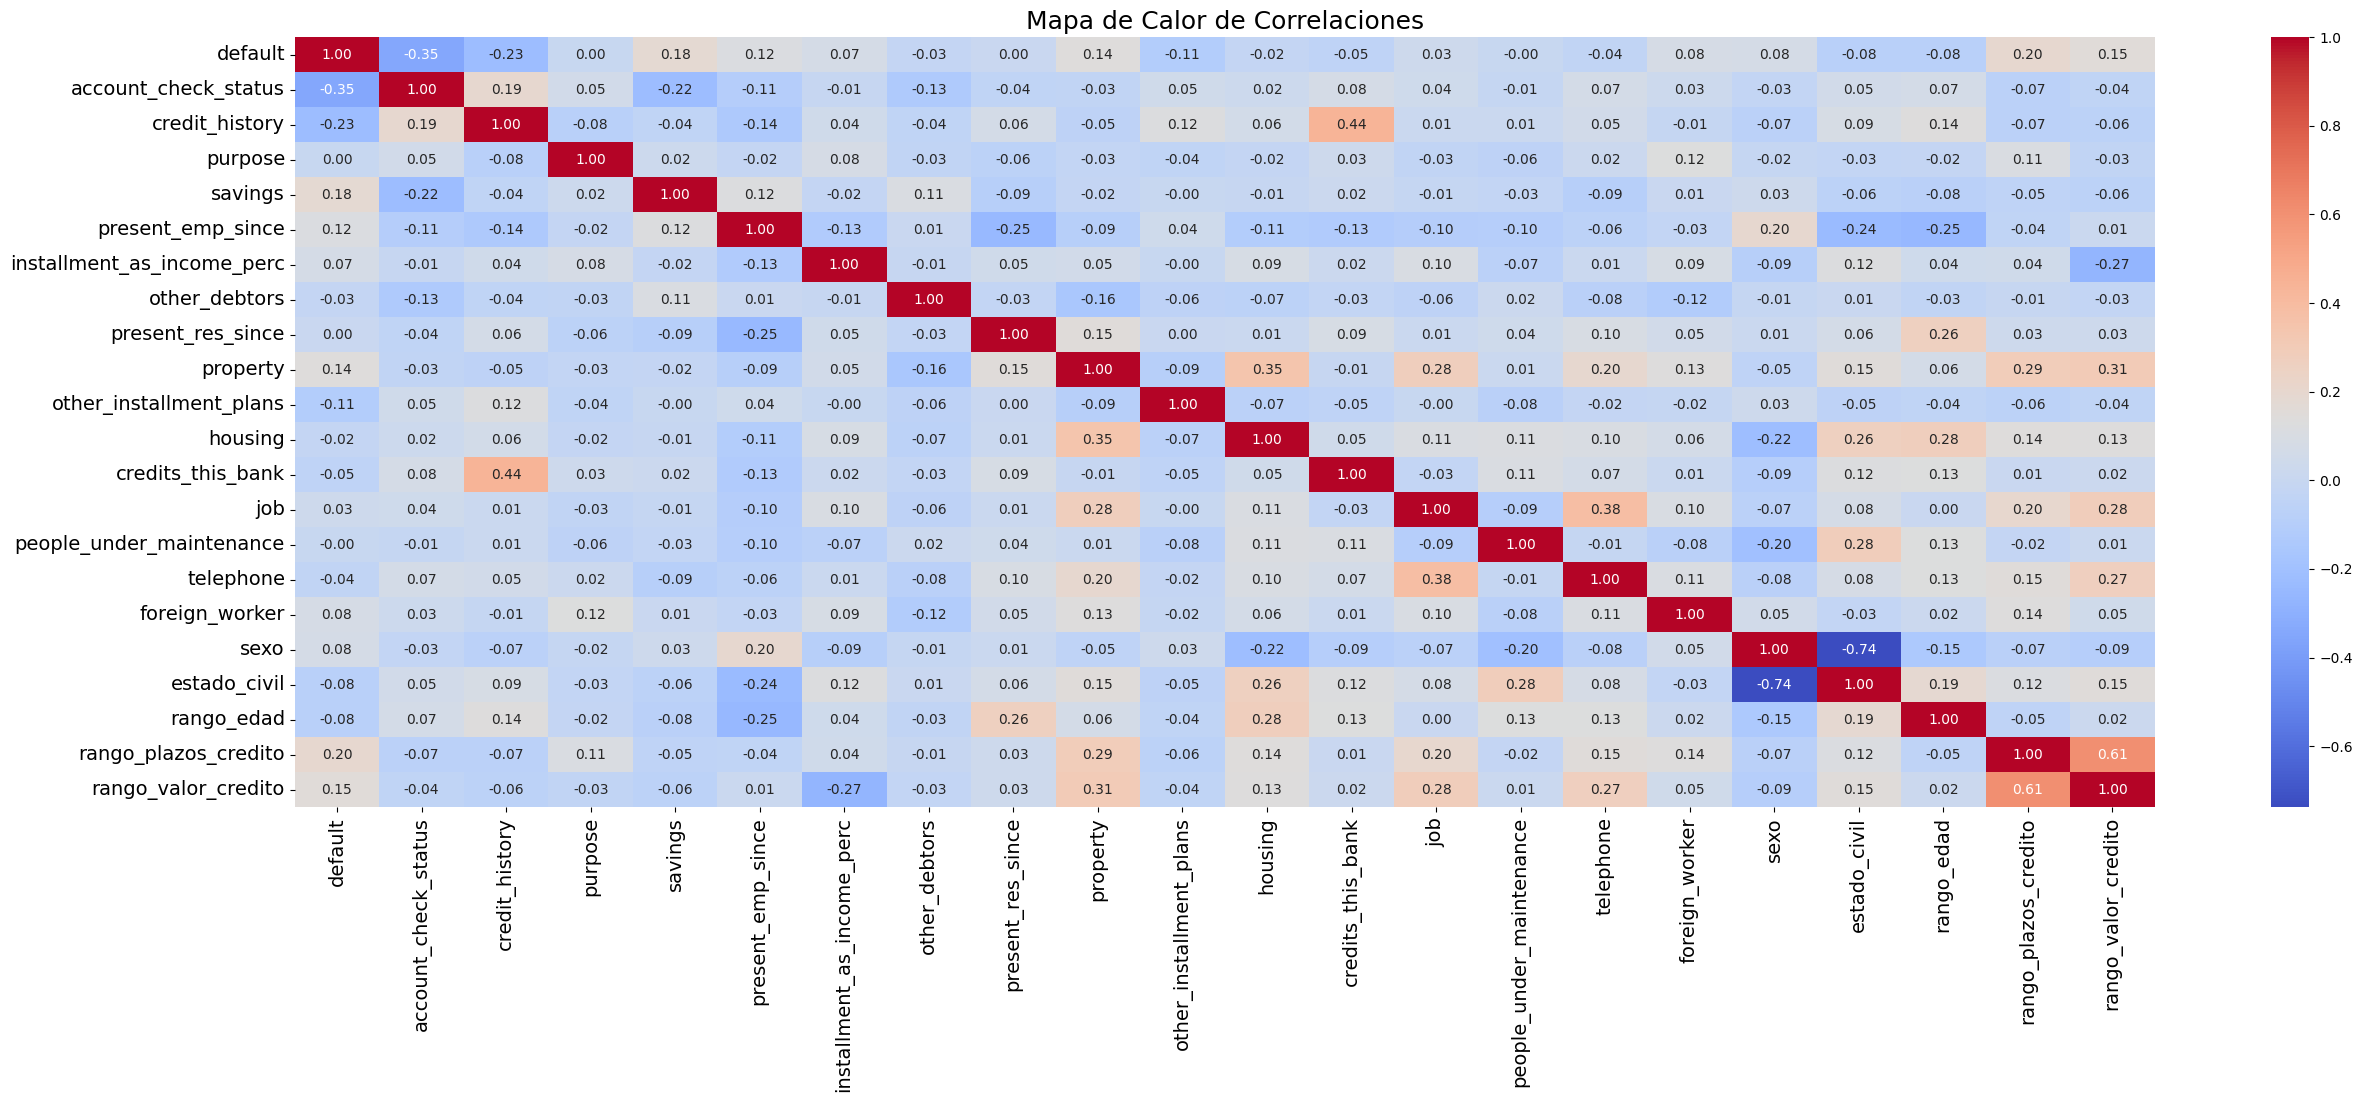

In [ ]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [49]:
# mio
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       142
              1       310
1             0       548
dtype: int64


In [ ]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       142
              1       310
1             0       548
dtype: int64


In [32]:
df_banco.dtypes

default                          int64
account_check_status             int64
credit_history                   int64
purpose                          int64
savings                          int64
present_emp_since                int64
installment_as_income_perc       int64
other_debtors                    int64
present_res_since                int64
property                         int64
other_installment_plans          int64
housing                          int64
credits_this_bank                int64
job                              int64
people_under_maintenance         int64
telephone                        int64
foreign_worker                   int64
sexo                             int64
estado_civil                     int64
rango_edad                    category
rango_plazos_credito          category
rango_valor_credito           category
dtype: object

In [40]:
df_banco.head(7)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5
5,0,4,3,8,1,3,2,1,4,4,3,3,1,2,2,1,1,0,1,2,3,10
6,0,4,3,4,3,1,3,1,4,2,3,2,1,3,1,0,1,0,1,4,2,3


#**4. Construcción de Modelos**


---


In [41]:
# Paso 1: Separar en bases de entrenamiento y prueba
#y = df_banco['default']
#x = df_banco.drop(columns='default')
#train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)


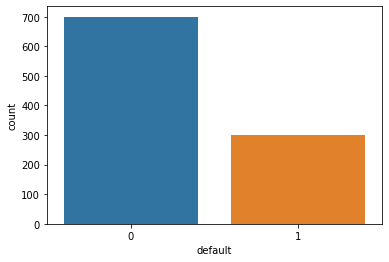

0    700
1    300
Name: default, dtype: int64


In [44]:
# Ver si los datos estan balaceado
# Visualización de la distribución de la variable objetivo
ax = sns.countplot(x='default', data=df_banco)
plt.show()

# Imprimir el conteo de cada clase
print(df_banco['default'].value_counts())

In [51]:
from imblearn.over_sampling import SMOTE


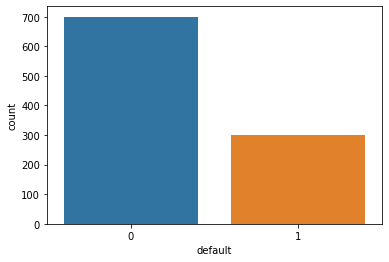

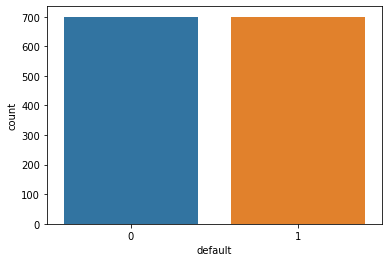

In [52]:
# Crear la función para balancear los datos
def balancear_datos(df):
    # Visualización de la distribución de la variable objetivo (antes del balanceo)
    sns.countplot(x='default', data=df)
    plt.show()

    # Dividir los datos en características y target
    X = df.drop('default', axis=1)
    y = df['default']

    # Aplicar SMOTE para balancear las clases
    smote = SMOTE(random_state=123)
    X_balanced, y_balanced = smote.fit_resample(X, y)

    # Unión de los datos balanceados
    df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

    # Visualización de la distribución de la variable objetivo (después del balanceo)
    sns.countplot(x='default', data=df_balanced)
    plt.show()

    return df_balanced

# Balancear los datos antes de dividir en conjuntos de entrenamiento y prueba
df_banco_balanced = balancear_datos(df_banco)

# Dividir en conjuntos de entrenamiento y prueba después del balanceo
y_balanced = df_banco_balanced['default']
x_balanced = df_banco_balanced.drop(columns='default')
train_x, test_x, train_y, test_y = train_test_split(x_balanced, y_balanced, test_size=0.30, random_state=77)


In [ ]:
#Tu función crea_modelos() y tu código aqui

In [ ]:
crea_modelos()
for i, model in enumerate(resultados['Model']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1-score'][i]}")
    print(f"AUC-ROC: {resultados['AUC-ROC'][i]}\n")

Modelo: Regresión Logística
Accuracy: 0.78
Precisión: 0.6785714285714286
Recall: 0.4418604651162791
F1-score: 0.5352112676056338
AUC-ROC: 0.799934796783308

Modelo: Árbol de Decisión
Accuracy: 0.7066666666666667
Precisión: 0.4875
Recall: 0.45348837209302323
F1-score: 0.46987951807228917
AUC-ROC: 0.6309497935231472

Modelo: Random Forest
Accuracy: 0.78
Precisión: 0.717391304347826
Recall: 0.38372093023255816
F1-score: 0.5000000000000001
AUC-ROC: 0.7882525537926537

Modelo: Naive Bayes
Accuracy: 0.74
Precisión: 0.5465116279069767
Recall: 0.5465116279069767
F1-score: 0.5465116279069767
AUC-ROC: 0.7800478156922409



#**5. Evaluación y Selección del Modelo**


---


In [ ]:
#Tu función visualiza_resultados() y tu código aqui

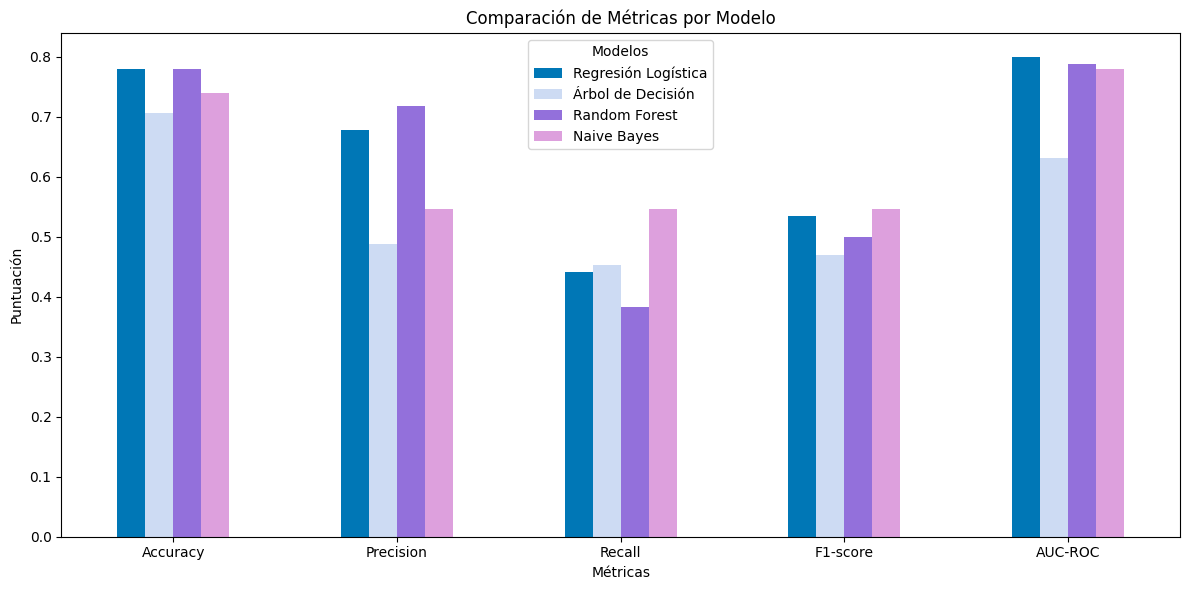

In [ ]:
visualiza_resultados()